In [2]:
import numpy as np
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [3]:
import os
import cv2

In [4]:
train_dir = "IQ OTH - Lung Cancer Dataset\\The IQ-OTHNCCD lung cancer dataset"
test_dir = "IQ OTH - Lung Cancer Dataset\Test cases"
class_labels = ["Bengin cases", "Malignant cases", "Normal cases"]
#load train dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = "inferred",
    label_mode = "categorical",
    class_names = class_labels,
    image_size = (224, 224),
    seed = 33
)
print(train_dataset.element_spec) #(images, labels)

#load test cases
test_cases = []
for filename in os.listdir(test_dir):
    if filename.lower().endswith(".png"):
        img_path = os.path.join(test_dir, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))
        test_cases.append(img)

test_cases = np.array(test_cases)
print(test_cases.shape)

Found 1097 files belonging to 3 classes.
(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))
(197, 224, 224, 3)


images shape: (32, 224, 224, 3)
labes shape: (32, 3)


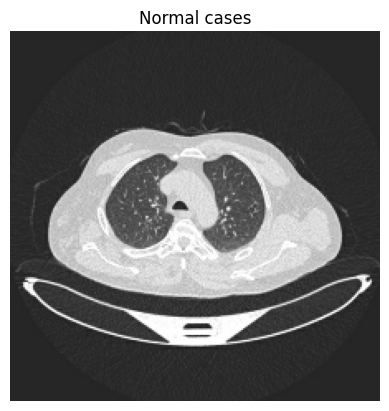

In [5]:
#visualizing image

for images, labels in train_dataset.take(1):
    print("images shape:", images.shape)
    print("labes shape:", labels.shape)

    random_img = images[5].numpy()
    img_label = labels[5].numpy()
    class_ind = img_label.argmax()
    label = class_labels[class_ind]
    plt.imshow(random_img.astype("uint8"))
    plt.title(label)
    plt.axis("off")
    plt.show()

In [6]:
#Scaling pixel values

def scale_image(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.map(scale_image, num_parallel_calls=AUTOTUNE)
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)


In [7]:
# Data augmentation

data_aug = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(.2),
    tf.keras.layers.RandomZoom(.2),
    tf.keras.layers.RandomTranslation(.2, .2)
])


def augment_image(image, label):
    image = data_aug(image)
    return image, label

train_dataset = train_dataset.map(augment_image)

In [14]:
tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
    name="resnet50",
)

<Functional name=resnet50, built=True>

In [13]:
from tf.keras.applications import ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

ModuleNotFoundError: No module named 'tf'

In [19]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Replace 'num_classes' with the number of classes
])


In [21]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [22]:
history = model.fit(
    train_dataset,
    epochs=10,
    steps_per_epoch= 12
)


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.5094 - loss: 0.9731
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4732 - loss: 0.9784
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4218 - loss: 1.0339
Epoch 4/10


c:\Users\SRTU\AppData\Local\Programs\Python\Python39\lib\contextlib.py:135: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(type, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5435 - loss: 0.9056
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4234 - loss: 0.9732
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.4737 - loss: 0.9733
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.4960 - loss: 0.9748
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5339 - loss: 0.9380
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.3823 - loss: 0.9911
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5391 - loss: 0.9170


In [23]:
scores=model.evaluate(test_cases)

ValueError: None values not supported.